In [3]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as linalg

In [4]:
# Make sure to replace the location of the .xlsx file
features_train = pd.read_excel(r'C:\Users\mattn\Desktop\polynomial.xlsx')

#Sort X into ascending order
features_train.sort_values(['x'], axis=0, ascending=True, inplace=True)

In [5]:
features_train

,Unnamed: 0,x,y
16,16,-4.760181,-162.084241
10,10,-4.701238,-155.192926
8,8,-4.485328,-125.275943
6,6,-3.744147,-72.556875
7,7,-2.927571,-29.934683
18,18,-2.407476,-15.690391
13,13,-2.215127,2.772584
2,2,-2.090953,-10.895881
19,19,-0.848988,-2.259106
9,9,-0.591902,1.586948


In [6]:
x_train = features_train['x'].as_matrix()
y_train = features_train['y'].as_matrix()

c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


<IPython.core.display.Javascript object>


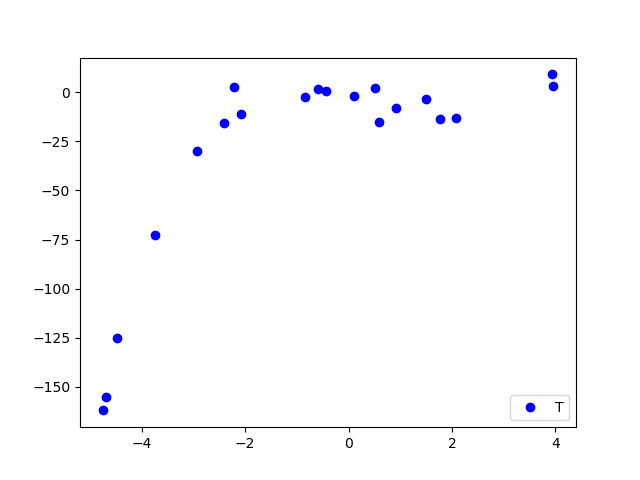

In [7]:
%matplotlib notebook
plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.legend(('Training points'), loc = 'lower right')
#plt.hold(True)
plt.savefig('trainingdata.png')
plt.show()

In [8]:
def getPolynomialDataMatrix(features_train, degree):
    X = np.ones(features_train.shape)
    for i in range(1,degree + 1):
        X = np.column_stack((X, features_train ** i))
    return X

print(getPolynomialDataMatrix(features_train, 3))

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.60000000e+01
  -4.76018118e+00 -1.62084241e+02  2.56000000e+02  2.26593248e+01
   2.62713012e+04  4.09600000e+03 -1.07862492e+02 -4.25816392e+06]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+01
  -4.70123789e+00 -1.55192926e+02  1.00000000e+02  2.21016377e+01
   2.40848442e+04  1.00000000e+03 -1.03905057e+02 -3.73779743e+06]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  8.00000000e+00
  -4.48532797e+00 -1.25275943e+02  6.40000000e+01  2.01181670e+01
   1.56940620e+04  5.12000000e+02 -9.02365770e+01 -1.96608843e+06]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  6.00000000e+00
  -3.74414690e+00 -7.25568750e+01  3.60000000e+01  1.40186360e+01
   5.26450011e+03  2.16000000e+02 -5.24878324e+01 -3.81975677e+05]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  7.00000000e+00
  -2.92757122e+00 -2.99346834e+01  4.90000000e+01  8.57067324e+00
   8.96085272e+02  3.43000000e+02 -2.50912563e+01 -2.68240289e+04]
 [ 1.

In [9]:
def pol_regression(features_train, y_train, degree):
    X = getPolynomialDataMatrix(features_train, degree)
    
    XX = X.transpose().dot(X)
    parameters = np.linalg.solve(XX, X.transpose().dot(y_train))
    
    return parameters

<IPython.core.display.Javascript object>


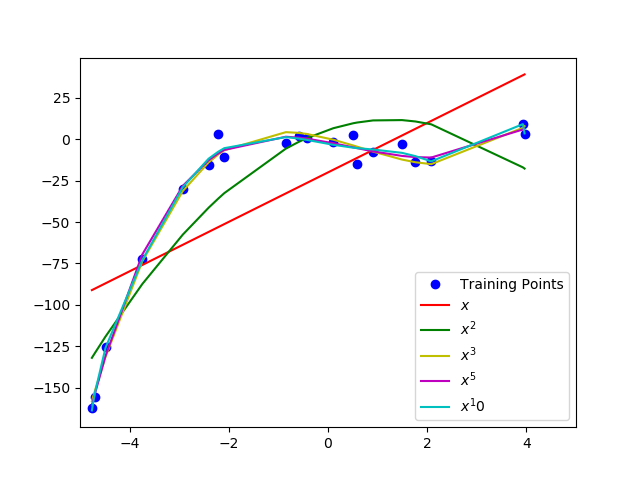

In [10]:
#Plot polynomial functions
%matplotlib notebook
plt.figure()
plt.plot(x_train, y_train, 'bo')

parameters1 = pol_regression(x_train,y_train,1)
Xtest1 = getPolynomialDataMatrix(x_train, 1)
ytest1 = Xtest1.dot(parameters1)
plt.plot(x_train, ytest1, 'r')

parameters2 = pol_regression(x_train,y_train,2)
Xtest2 = getPolynomialDataMatrix(x_train, 2)
ytest2 = Xtest2.dot(parameters2)
plt.plot(x_train, ytest2, 'g')

parameters3 = pol_regression(x_train,y_train,3)
Xtest3 = getPolynomialDataMatrix(x_train, 3)
ytest3 = Xtest3.dot(parameters3)
plt.plot(x_train, ytest3, 'y')

parameters5 = pol_regression(x_train,y_train,5)
Xtest5 = getPolynomialDataMatrix(x_train, 5)
ytest5 = Xtest5.dot(parameters5)
plt.plot(x_train, ytest5, 'm')

parameters10 = pol_regression(x_train,y_train,10)
Xtest10 = getPolynomialDataMatrix(x_train, 10)
ytest10 = Xtest10.dot(parameters10)
plt.plot(x_train, ytest10, 'c')

plt.xlim((-5, 5))
plt.legend(('Training Points', '$x$', '$x^2$', '$x^3$', '$x^5$', '$x^10$'), loc = 'lower right')



In [12]:
# Split the data into 70% training and 30% testing
train = features_train.sample(frac=0.7, random_state=10)
test = features_train.drop(train.index)
xTrain = train['x'].as_matrix()
yTrain = train['y'].as_matrix()

xTest = test['x'].as_matrix()
yTest = test['y'].as_matrix()


c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [13]:
def eval_pol_regression(parameters, x, y, degree):
    
    fitted_parameters = np.polyfit(x, y, degree)
    y_predicted = np.polyval(fitted_parameters, x)
    SE = np.square(y_predicted - y)#Squared Errors
    MSE = np.mean(SE)#Mean Squared Errors
    RMSE = np.sqrt(MSE)#Root Mean Squared Errors
    return RMSE
    

In [14]:
#Collect RMSE values for the test data
train_parameters1 = pol_regression(xTrain, yTrain, 1)
train_RMSE1 = eval_pol_regression(train_parameters1, xTrain, yTrain, 1)

train_parameters2 = pol_regression(xTrain, yTrain, 2)
train_RMSE2 = eval_pol_regression(train_parameters2, xTrain, yTrain, 2)

train_parameters3 = pol_regression(xTrain, yTrain, 3)
train_RMSE3 = eval_pol_regression(train_parameters3, xTrain, yTrain, 3)

train_parameters5 = pol_regression(xTrain, yTrain, 5)
train_RMSE5 = eval_pol_regression(train_parameters5, xTrain, yTrain, 5)

train_parameters10 = pol_regression(xTrain, yTrain, 10)
train_RMSE10 = eval_pol_regression(train_parameters10, xTrain, yTrain, 10)

train_RMSE = [train_RMSE1, train_RMSE2, train_RMSE3, train_RMSE5, train_RMSE10]

#Collect RMSE values for the training data
test_parameters1 = pol_regression(xTest, yTest, 1)
test_RMSE1 = eval_pol_regression(test_parameters1, xTest, yTest, 1)

test_parameters2 = pol_regression(xTest, yTest, 2)
test_RMSE2 = eval_pol_regression(test_parameters2, xTest, yTest, 2)

test_parameters3 = pol_regression(xTest, yTest, 3)
test_RMSE3 = eval_pol_regression(test_parameters3, xTest, yTest, 3)

test_parameters5 = pol_regression(xTest, yTest, 5)
test_RMSE5 = eval_pol_regression(test_parameters5, xTest, yTest, 5)

test_parameters10 = pol_regression(xTest, yTest, 10)
test_RMSE10 = eval_pol_regression(test_parameters10, xTest, yTest, 10)

test_RMSE = [test_RMSE1, test_RMSE2, test_RMSE3, test_RMSE5, test_RMSE10]

c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:33: RankWarning: Polyfit may be poorly conditioned


<IPython.core.display.Javascript object>


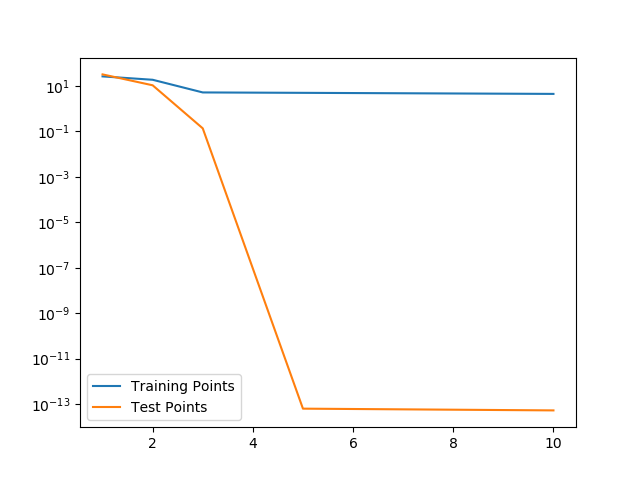

In [15]:
%matplotlib notebook
plt.figure()

plt.semilogy([1, 2, 3, 5, 10], train_RMSE)
plt.semilogy([1, 2, 3, 5, 10], test_RMSE)
plt.legend(('Training Points', 'Test Points'))